In [44]:
import pandas as pd
import pandas_ta
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [45]:
data = pd.read_csv("../data/stock.csv")


In [48]:
data.ta.ema(close='Adj_Close', length=10, append=True)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4387    113.215459
4388    112.970830
4389    112.836134
4390    112.745927
4391    112.826668
Name: EMA_10, Length: 4392, dtype: float64

In [49]:
data.head()


,Date,Open,High,Low,Close,Adj_Close,Volume,EMA_10
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600,NaN
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600,NaN
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200,NaN
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600,NaN
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600,NaN


In [50]:
data = data.iloc[10:]

In [51]:
data.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,EMA_10
10,2000/4/10,3.687500,3.750000,3.625000,3.640625,3.640625,5280800,3.687926
11,2000/4/11,3.578125,3.656250,3.562500,3.578125,3.578125,6590000,3.667962
12,2000/4/12,3.546875,3.640625,3.531250,3.578125,3.578125,8546400,3.651628
13,2000/4/13,3.578125,3.656250,3.578125,3.613275,3.613275,6874400,3.644655
14,2000/4/14,3.609375,3.625000,3.531250,3.609375,3.609375,2626000,3.638240


In [52]:
X_train, X_test, y_train, y_test = train_test_split(data[['Adj_Close']], data[['EMA_10']], test_size=.2)

In [53]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [54]:
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.99515677]]
Mean Absolute Error: 0.5732022320102401
Coefficient of Determination: 0.9985132031115511


In [55]:
import seaborn as sns
sns.set_theme(color_codes=True)


/Users/anshumalikarna/miniforge3/envs/QMSS_Project/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/anshumalikarna/miniforge3/envs/QMSS_Project/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Adj_Close', ylabel='EMA_10'>

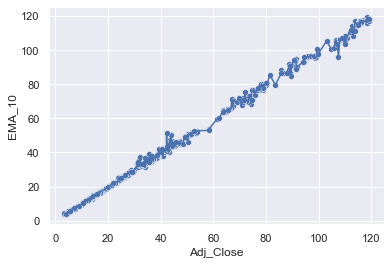

In [57]:
sns.scatterplot(X_test["Adj_Close"], y_test["EMA_10"])
sns.lineplot(X_test["Adj_Close"], y_test["EMA_10"])
